In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
from matplotlib import font_manager
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [100]:
data=pd.read_excel('통합데이터v2.xlsx')

In [101]:
data.columns

Index(['개방서비스명', '개방자치단체코드', '인허가일자', '도로명전체주소', '사업장명', '의료인수', '입원실수', '병상수',
       '총면적', '진료과목내용명', '종별코드', '종별코드명', '시도코드', '시도명', '시군구코드', '시군구명',
       'X좌표', 'Y좌표', '의사총수', '일반의의사수', '인턴의사수', '레지던트의사수', '전문의합계', '내과',
       '신경과', '정신건강의학과', '외과', '정형외과', '신경외과', '흉부외과', '성형외과', '마취통증의학과',
       '산부인과', '소아청소년과', '안과', '이비인후과', '피부과', '비뇨의학과', '영상의학과', '방사선종양학과',
       '병리과', '진단검사의학과', '결핵과', '재활의학과', '핵의학과', '가정의학과', '응급의학과', '직업환경의학과',
       '예방의학과', '치과', '구강악안면외과', '치과보철과', '치과교정과', '소아치과', '치주과', '치과보존과',
       '구강내과', '영상치의학과', '구강병리과', '예방치과', '통합치의학과', '한방내과', '한방부인과', '한방소아과',
       '한방안이비인후피부과', '한방신경정신과', '침구과', '한방재활의학과', '사상체질과', '한방응급', '의료장비합계',
       '유방촬영장치', 'CT', '콘빔CT', '양전자단층촬영기 (PET)', '골밀도검사기', 'MRI', '초음파영상진단기',
       '종양치료기(Gamma Knife)', '종양치료기(Cyber Knife)', '종양치료기(양성자치료기)', '체외충격파쇄석기',
       '혈액투석을위한인공신장기', '구글점수', '구글건수', '다음점수', '다음건수', '네이버평점', '네이버건수',
       '진료만족도', '의료진친절도', '시설만족도', '굿닥건수', '최종보정점수'],
      dtype='object')

In [102]:
data=data[['사업장명','의료인수','입원실수', '병상수','진료과목내용명','의사총수', '일반의의사수', '인턴의사수', '레지던트의사수', '전문의합계', '내과',
       '신경과', '정신건강의학과', '외과', '정형외과', '신경외과', '흉부외과', '성형외과', '마취통증의학과',
       '산부인과', '소아청소년과', '안과', '이비인후과', '피부과', '비뇨의학과', '영상의학과', '방사선종양학과',
       '병리과', '진단검사의학과', '결핵과', '재활의학과', '핵의학과', '가정의학과', '응급의학과', '직업환경의학과',
       '예방의학과', '치과', '구강악안면외과', '치과보철과', '치과교정과', '소아치과', '치주과', '치과보존과',
       '구강내과', '영상치의학과', '구강병리과', '예방치과', '통합치의학과', '한방내과', '한방부인과', '한방소아과','의료장비합계',
       '한방안이비인후피부과', '한방신경정신과', '침구과', '한방재활의학과', '사상체질과', '한방응급','최종보정점수']]

In [103]:
data['진료과목수']=data['진료과목내용명'].apply(lambda x: len(str(x).split(','))-1)

In [104]:
data['4항목합']=0
for i in range(len(data)):
    data['4항목합'][i]=sum(data.iloc[i][['레지던트의사수','인턴의사수','일반의의사수','전문의합계']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
data['진료합']=0
for i in range(len(data)):
    data['진료합'][i]=sum(data.iloc[i][['내과',
       '신경과', '정신건강의학과', '외과', '정형외과', '신경외과', '흉부외과', '성형외과', '마취통증의학과',
       '산부인과', '소아청소년과', '안과', '이비인후과', '피부과', '비뇨의학과', '영상의학과', '방사선종양학과',
       '병리과', '진단검사의학과', '결핵과', '재활의학과', '핵의학과', '가정의학과', '응급의학과', '직업환경의학과',
       '예방의학과', '치과', '구강악안면외과', '치과보철과', '치과교정과', '소아치과', '치주과', '치과보존과',
       '구강내과', '영상치의학과', '구강병리과', '예방치과', '통합치의학과', '한방내과', '한방부인과', '한방소아과',
       '한방안이비인후피부과', '한방신경정신과', '침구과', '한방재활의학과', '사상체질과', '한방응급']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [106]:
data.head()

,사업장명,의료인수,입원실수,병상수,진료과목내용명,의사총수,일반의의사수,인턴의사수,레지던트의사수,전문의합계,...,한방안이비인후피부과,한방신경정신과,침구과,한방재활의학과,사상체질과,한방응급,최종보정점수,진료과목수,4항목합,진료합
0,비에스종합병원,14.0,55.0,213.0,NaN,20.0,1.0,0.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.652909,0,19.0,18.0
1,이화여자대학교의과대학부속서울병원,796.0,303.0,653.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",182.0,1.0,0.0,0.0,181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.244260,25,182.0,181.0
2,학교법인연세대학교의과대학세브란스병원,4758.0,823.0,2455.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",1183.0,7.0,132.0,212.0,828.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.567129,24,1179.0,828.0
3,의료법인동신의료재단 동신병원,112.0,59.0,207.0,"내과, 신경과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인과, 비뇨의학과,...",21.0,3.0,0.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.721797,11,21.0,18.0
4,서울특별시서울의료원,840.0,168.0,623.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",224.0,1.0,26.0,71.0,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.221450,24,222.0,124.0


In [107]:
#sns.pairplot(data[['의료인수','의사총수','4항목합','진료합','레지던트의사수','인턴의사수','일반의의사수']], kind="scatter")
#plt.show()

In [108]:
data[['의료인수','의사총수','4항목합','진료합','레지던트의사수','인턴의사수','일반의의사수']].corr()

,의료인수,의사총수,4항목합,진료합,레지던트의사수,인턴의사수,일반의의사수
의료인수,1.000000,0.956896,0.956678,0.966956,0.897376,0.899744,0.622820
의사총수,0.956896,1.000000,0.999977,0.988799,0.971851,0.961430,0.649521
4항목합,0.956678,0.999977,1.000000,0.988695,0.972064,0.961492,0.650222
진료합,0.966956,0.988799,0.988695,1.000000,0.927531,0.924703,0.649876
레지던트의사수,0.897376,0.971851,0.972064,0.927531,1.000000,0.959831,0.602513
인턴의사수,0.899744,0.961430,0.961492,0.924703,0.959831,1.000000,0.598469
일반의의사수,0.622820,0.649521,0.650222,0.649876,0.602513,0.598469,1.000000


In [109]:
data[['내과',
       '신경과', '정신건강의학과', '외과', '정형외과', '신경외과', '흉부외과', '성형외과', '마취통증의학과',
       '산부인과', '소아청소년과', '안과', '이비인후과', '피부과', '비뇨의학과', '영상의학과', '방사선종양학과',
       '병리과', '진단검사의학과', '결핵과']].describe()

,내과,신경과,정신건강의학과,외과,정형외과,신경외과,흉부외과,성형외과,마취통증의학과,산부인과,소아청소년과,안과,이비인후과,피부과,비뇨의학과,영상의학과,방사선종양학과,병리과,진단검사의학과,결핵과
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.0
mean,20.283708,3.030899,1.941011,6.609551,5.280899,3.575843,1.733146,1.106742,4.716292,3.306180,3.865169,1.977528,2.005618,0.862360,2.061798,6.261236,0.769663,1.817416,1.825843,0.0
std,30.686252,4.435662,3.344013,10.596668,4.777857,4.091541,3.541166,2.005586,7.693118,5.073995,6.749341,4.041273,3.042418,1.646384,2.656186,11.183830,1.824028,3.559210,2.098425,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.0
50%,9.000000,2.000000,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.0
75%,24.000000,4.000000,3.000000,7.000000,7.000000,5.000000,2.000000,1.000000,5.000000,4.000000,5.000000,2.000000,3.000000,1.000000,3.000000,7.000000,1.000000,2.000000,2.000000,0.0
max,299.000000,40.000000,39.000000,116.000000,35.000000,34.000000,32.000000,15.000000,84.000000,40.000000,59.000000,29.000000,20.000000,12.000000,18.000000,126.000000,15.000000,33.000000,18.000000,0.0


In [110]:
data[['재활의학과', '핵의학과', '가정의학과', '응급의학과', '직업환경의학과',
       '예방의학과', '치과', '구강악안면외과', '치과보철과', '치과교정과', '소아치과', '치주과', '치과보존과']].describe()

,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과,치과,구강악안면외과,치과보철과,치과교정과,소아치과,치주과,치과보존과
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.0,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,1.460674,0.598315,2.362360,4.623596,0.901685,0.101124,0.0,0.426966,0.207865,0.095506,0.030899,0.092697,0.106742
std,2.035218,1.329576,3.056397,4.073121,1.521266,0.520995,0.0,0.911741,0.647026,0.378108,0.216633,0.456382,0.486273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,3.000000,7.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,12.000000,26.000000,30.000000,9.000000,5.000000,0.0,6.000000,6.000000,3.000000,2.000000,4.000000,5.000000


In [111]:
data[['구강내과', '영상치의학과', '구강병리과', '예방치과', '통합치의학과', '한방내과', '한방부인과', '한방소아과',
       '한방안이비인후피부과', '한방신경정신과', '침구과', '한방재활의학과', '사상체질과', '한방응급']].describe()

,구강내과,영상치의학과,구강병리과,예방치과,통합치의학과,한방내과,한방부인과,한방소아과,한방안이비인후피부과,한방신경정신과,침구과,한방재활의학과,사상체질과,한방응급
count,356.000000,356.0,356.0,356.000000,356.000000,356.000000,356.000000,356.0,356.0,356.000000,356.000000,356.000000,356.0,356.0
mean,0.008427,0.0,0.0,0.002809,0.014045,0.014045,0.002809,0.0,0.0,0.005618,0.008427,0.019663,0.0,0.0
std,0.091540,0.0,0.0,0.053000,0.117842,0.139716,0.053000,0.0,0.0,0.074848,0.091540,0.174923,0.0,0.0
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,0.0,0.0,1.000000,1.000000,2.000000,1.000000,0.0,0.0,1.000000,1.000000,2.000000,0.0,0.0


In [112]:
data.drop(['결핵과','치과','영상치의학과','구강병리과','한방소아과','한방안이비인후피부과','사상체질과','한방응급'], axis=1, inplace=True)

In [113]:
data

,사업장명,의료인수,입원실수,병상수,진료과목내용명,의사총수,일반의의사수,인턴의사수,레지던트의사수,전문의합계,...,한방내과,한방부인과,의료장비합계,한방신경정신과,침구과,한방재활의학과,최종보정점수,진료과목수,4항목합,진료합
0,비에스종합병원,14.0,55.0,213.0,NaN,20.0,1.0,0.0,0.0,18.0,...,0.0,0.0,33.0,0.0,0.0,0.0,2.652909,0,19.0,18.0
1,이화여자대학교의과대학부속서울병원,796.0,303.0,653.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",182.0,1.0,0.0,0.0,181.0,...,0.0,0.0,107.0,0.0,0.0,0.0,3.244260,25,182.0,181.0
2,학교법인연세대학교의과대학세브란스병원,4758.0,823.0,2455.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",1183.0,7.0,132.0,212.0,828.0,...,0.0,0.0,233.0,0.0,0.0,0.0,3.567129,24,1179.0,828.0
3,의료법인동신의료재단 동신병원,112.0,59.0,207.0,"내과, 신경과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인과, 비뇨의학과,...",21.0,3.0,0.0,0.0,18.0,...,0.0,0.0,22.0,0.0,0.0,0.0,2.721797,11,21.0,18.0
4,서울특별시서울의료원,840.0,168.0,623.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",224.0,1.0,26.0,71.0,124.0,...,0.0,0.0,104.0,0.0,0.0,0.0,3.221450,24,222.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,청주성모병원,382.0,139.0,433.0,"예방의학과, 응급의학과, 가정의학과, 재활의학과, 진단검사의학과, 병리과, 영상의학...",104.0,0.0,15.0,12.0,77.0,...,0.0,0.0,78.0,0.0,0.0,0.0,2.668103,20,104.0,77.0
354,의료법인정산의료재단효성병원,172.0,85.0,423.0,"이비인후과, 구강악안면외과, 응급의학과, 비뇨의학과, 예방의학과, 가정의학과, 재활...",49.0,3.0,0.0,1.0,46.0,...,0.0,0.0,49.0,0.0,0.0,0.0,0.903017,16,50.0,46.0
355,한림대학교동탄성심병원,1051.0,212.0,800.0,"치과보존과, 치과교정과, 치과보철과, 구강악안면외과, 응급의학과, 핵의학과, 가정의...",263.0,0.0,26.0,67.0,172.0,...,0.0,0.0,93.0,0.0,0.0,0.0,NaN,26,265.0,172.0
356,당진종합병원,74.0,75.0,288.0,"내과, 신경과, 외과, 정형외과, 신경외과, 마취통증의학과, 소아청소년과, 비뇨의학...",28.0,0.0,0.0,0.0,27.0,...,0.0,0.0,43.0,0.0,0.0,0.0,NaN,12,27.0,27.0


In [114]:
#https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=TX_35003_A003 2018 의료인력현황

In [115]:
price=pd.read_csv('1인실.csv',encoding='euc-kr')

In [116]:
price

,사업장명,분류,명칭,최저비용,최고비용
0,비에스종합병원,상급병실료,1인실,250000.0,250000.0
1,이화여자대학교의과대학부속서울병원,상급병실료,1인실,310000.0,405000.0
2,학교법인연세대학교의과대학세브란스병원,상급병실료,1인실,104000.0,457000.0
3,의료법인동신의료재단 동신병원,상급병실료,1인실,200000.0,200000.0
4,서울특별시서울의료원,상급병실료,1인실,218000.0,230000.0
...,...,...,...,...,...
353,청주성모병원,상급병실료,1인실,180000.0,180000.0
354,의료법인정산의료재단효성병원,NaN,NaN,NaN,NaN
355,한림대학교동탄성심병원,상급병실료,1인실,400000.0,400000.0
356,당진종합병원,상급병실료,1인실,140000.0,170000.0


In [117]:
data['진료과목수_전문의']=0

In [118]:
data
for j in range(len(data)):
    for i in ['내과',
       '신경과', '정신건강의학과', '외과', '정형외과', '신경외과', '흉부외과', '성형외과', '마취통증의학과',
       '산부인과', '소아청소년과', '안과', '이비인후과', '피부과', '비뇨의학과', '영상의학과', '방사선종양학과',
       '병리과', '진단검사의학과',  '재활의학과', '핵의학과', '가정의학과', '응급의학과', '직업환경의학과',
       '예방의학과',  '구강악안면외과', '치과보철과', '치과교정과', '소아치과', '치주과', '치과보존과',
       '구강내과',   '예방치과', '통합치의학과', '한방내과', '한방부인과',
        '한방신경정신과', '침구과', '한방재활의학과']:
        if data.iloc[j][i] > 0:
            data['진료과목수_전문의'][j] +=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [119]:
how=pd.concat([data,price],axis=1)

In [120]:
how.columns

Index(['사업장명', '의료인수', '입원실수', '병상수', '진료과목내용명', '의사총수', '일반의의사수', '인턴의사수',
       '레지던트의사수', '전문의합계', '내과', '신경과', '정신건강의학과', '외과', '정형외과', '신경외과',
       '흉부외과', '성형외과', '마취통증의학과', '산부인과', '소아청소년과', '안과', '이비인후과', '피부과',
       '비뇨의학과', '영상의학과', '방사선종양학과', '병리과', '진단검사의학과', '재활의학과', '핵의학과', '가정의학과',
       '응급의학과', '직업환경의학과', '예방의학과', '구강악안면외과', '치과보철과', '치과교정과', '소아치과', '치주과',
       '치과보존과', '구강내과', '예방치과', '통합치의학과', '한방내과', '한방부인과', '의료장비합계', '한방신경정신과',
       '침구과', '한방재활의학과', '최종보정점수', '진료과목수', '4항목합', '진료합', '진료과목수_전문의', '사업장명',
       '분류', '명칭', '최저비용', '최고비용'],
      dtype='object')

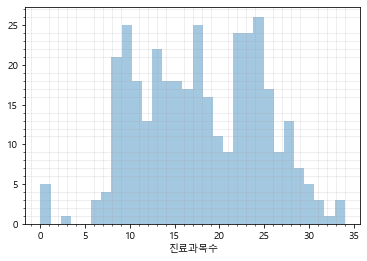

In [121]:
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
sns.distplot(data.진료과목수, bins=30,hist=True,kde=False,rug=False)

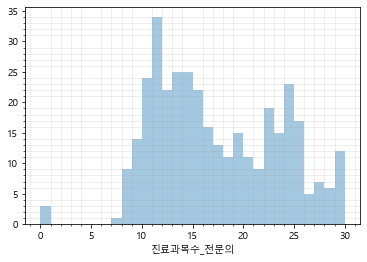

In [122]:
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
sns.distplot(data.진료과목수_전문의, bins=30,hist=True,kde=False,rug=False)

Text(0.5, 1.0, '인허가 데이터')

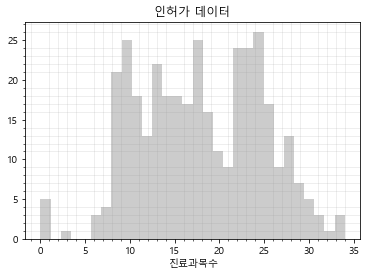

In [123]:
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
a=sns.distplot(data.진료과목수, bins=30,hist=True,kde=False,rug=False,
              color='gray')
a.set_title('인허가 데이터')

In [125]:
how.columns

Index(['사업장명', '의료인수', '입원실수', '병상수', '진료과목내용명', '의사총수', '일반의의사수', '인턴의사수',
       '레지던트의사수', '전문의합계', '내과', '신경과', '정신건강의학과', '외과', '정형외과', '신경외과',
       '흉부외과', '성형외과', '마취통증의학과', '산부인과', '소아청소년과', '안과', '이비인후과', '피부과',
       '비뇨의학과', '영상의학과', '방사선종양학과', '병리과', '진단검사의학과', '재활의학과', '핵의학과', '가정의학과',
       '응급의학과', '직업환경의학과', '예방의학과', '구강악안면외과', '치과보철과', '치과교정과', '소아치과', '치주과',
       '치과보존과', '구강내과', '예방치과', '통합치의학과', '한방내과', '한방부인과', '의료장비합계', '한방신경정신과',
       '침구과', '한방재활의학과', '최종보정점수', '진료과목수', '4항목합', '진료합', '진료과목수_전문의', '사업장명',
       '분류', '명칭', '최저비용', '최고비용'],
      dtype='object')

In [124]:
how.corr()[['최저비용','최고비용']].sort_values(by='최저비용',ascending=False)

,최저비용,최고비용
최저비용,1.000000,0.850206
최고비용,0.850206,1.000000
진단검사의학과,0.513800,0.622289
레지던트의사수,0.505797,0.609366
의사총수,0.497202,0.622290
4항목합,0.497200,0.622545
정형외과,0.494501,0.588024
진료합,0.488735,0.618662
전문의합계,0.488735,0.618662
비뇨의학과,0.487389,0.609911


In [127]:
how.to_csv('비용합친거.csv',encoding='euc-kr',index=False)

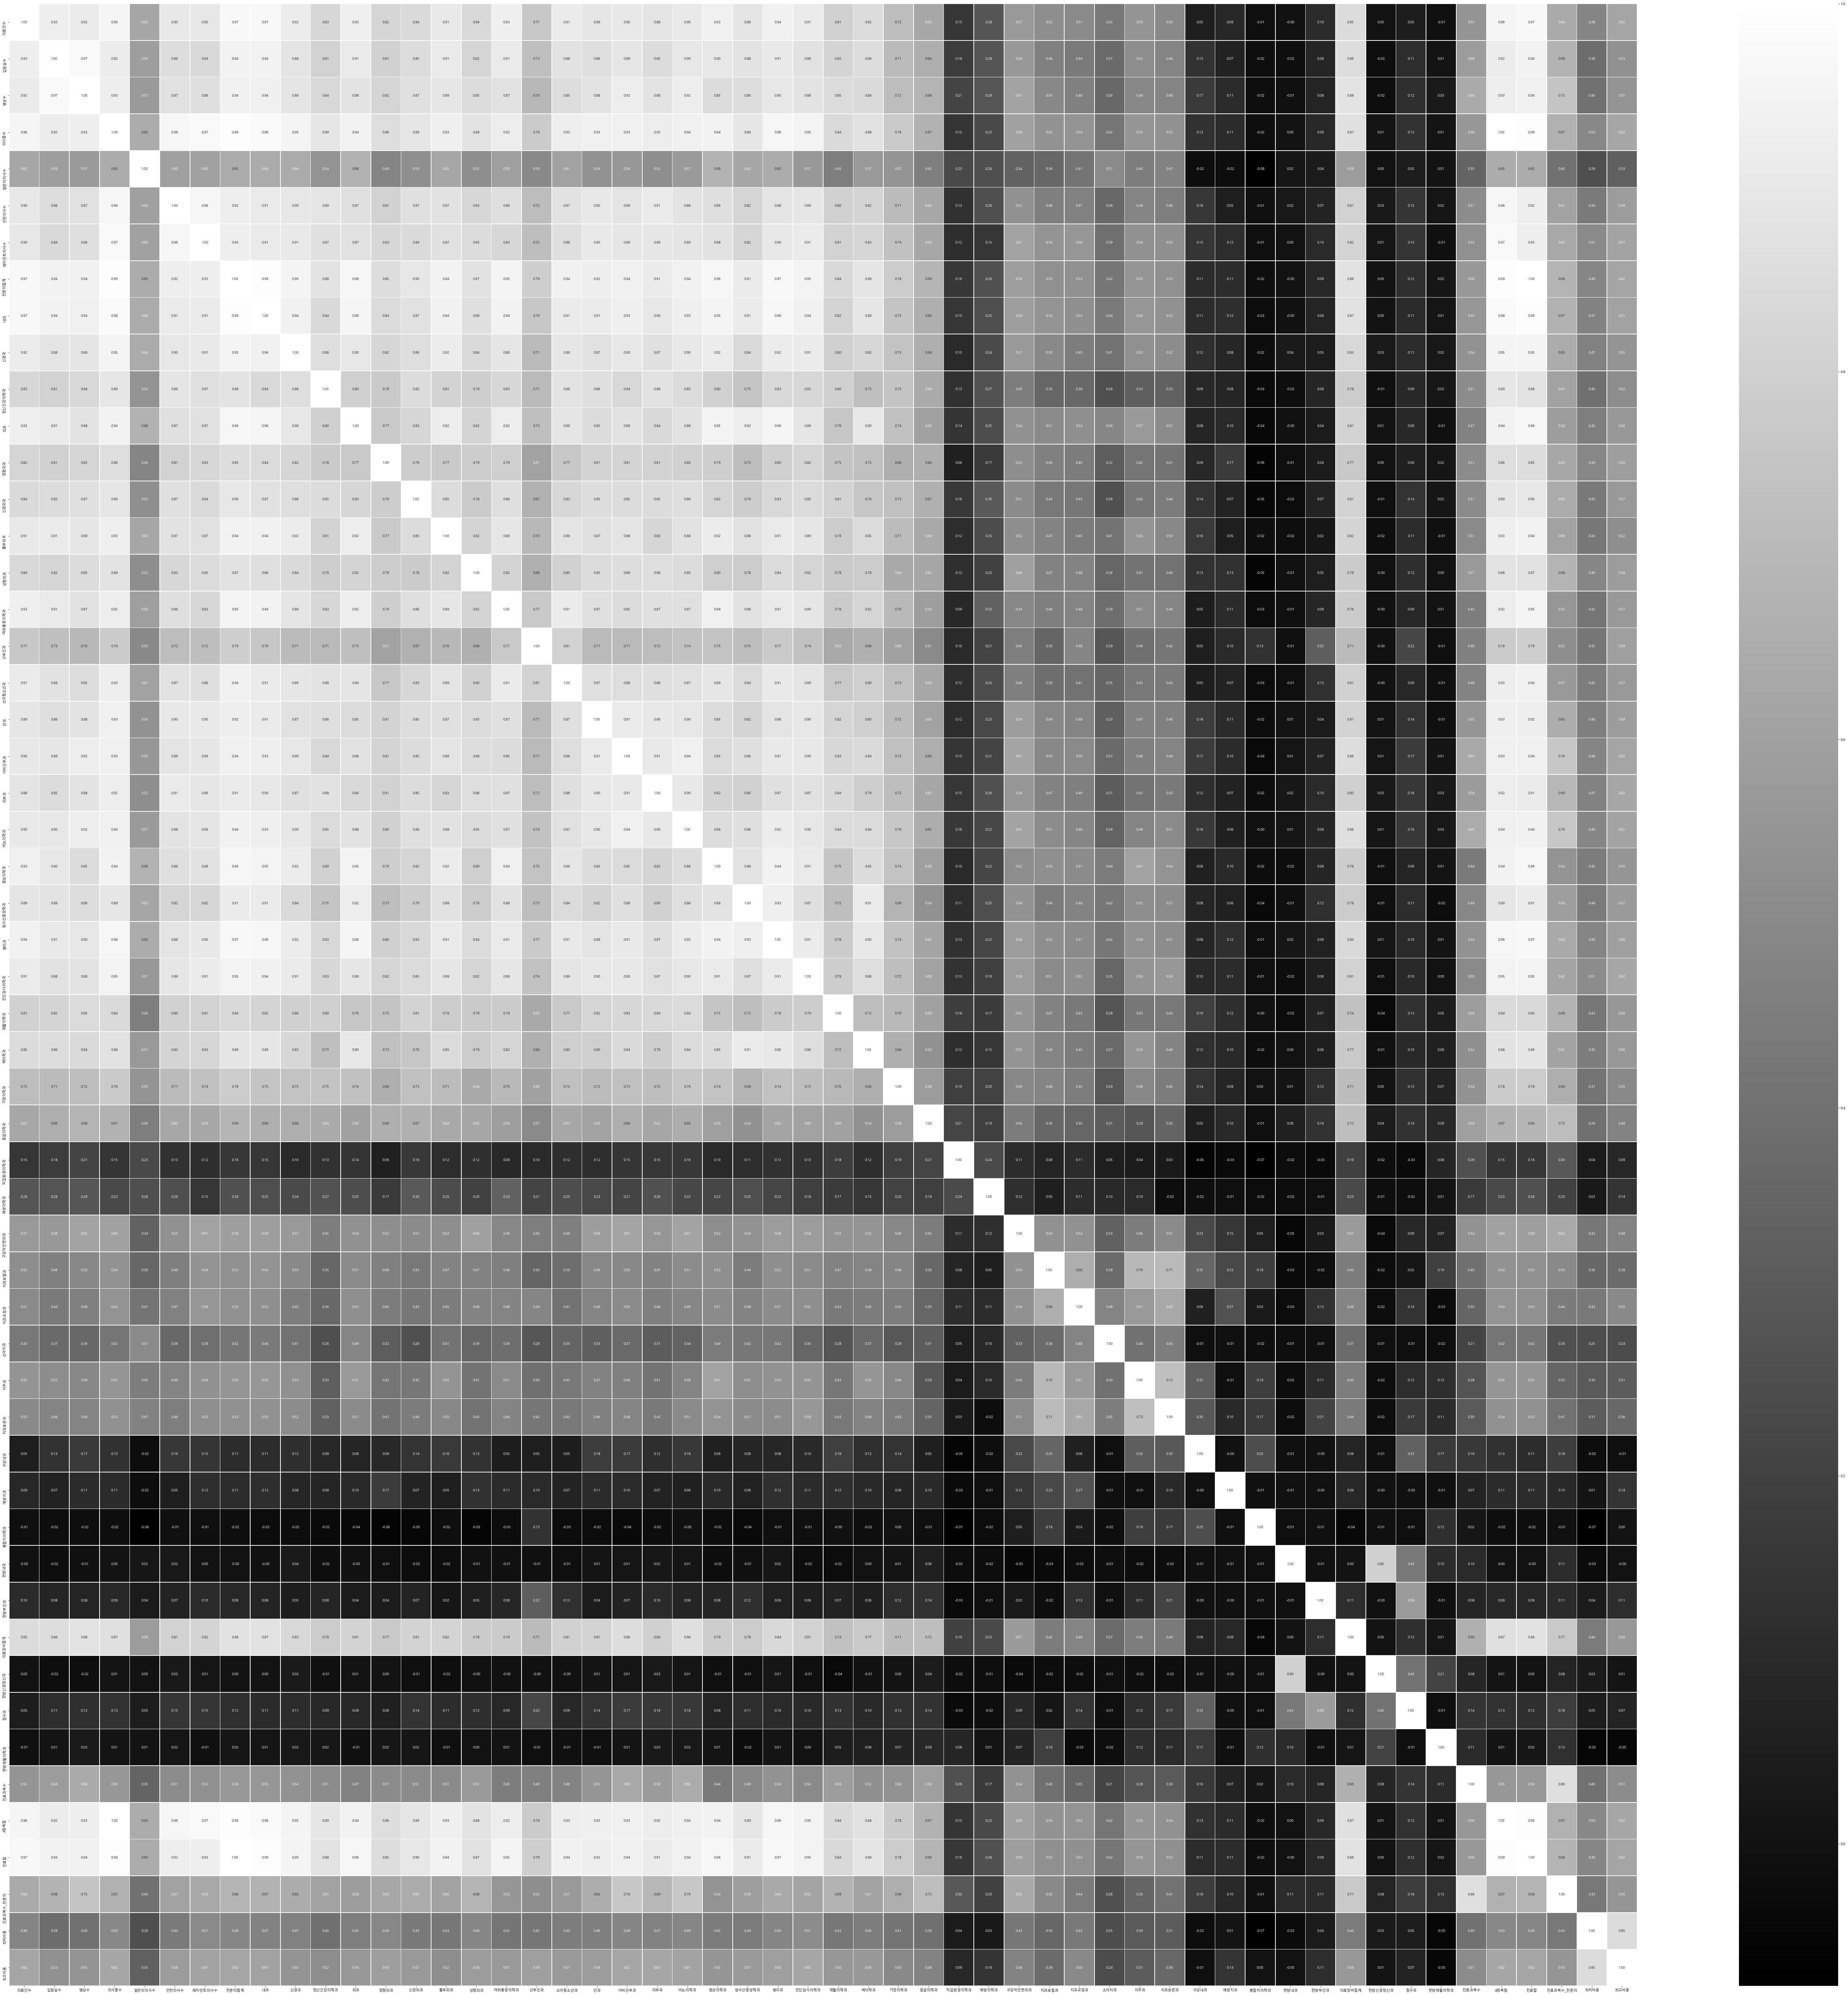

In [83]:
plt.figure(figsize=(100,100))
sns.heatmap(data = how.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='gray')